# **Seeds**

Measurements of geometrical properties of kernels belonging to three different varieties of wheat. A soft X-ray technique and GRAINS package were used to construct all seven, real-valued attributes.

https://archive.ics.uci.edu/dataset/236/seeds

# Importing libraries and data

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

In [143]:
cols = ["area", "perimeter", "compactness", "length",
        "width", "asymmetry", "groove", "class"]

In [144]:
# Using regular expression to capture one or more whitespaces.
df = pd.read_csv("seeds_dataset.txt", names=cols, sep="\s+")

In [145]:
df
df['class'].unique()

,area,perimeter,compactness,length,width,asymmetry,groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


array([1, 2, 3], dtype=int64)

# Visualizing Data

- Scatterplot of every feature against every other feature (skip the last feature: class);
- And use hue to categorize points into their classes.

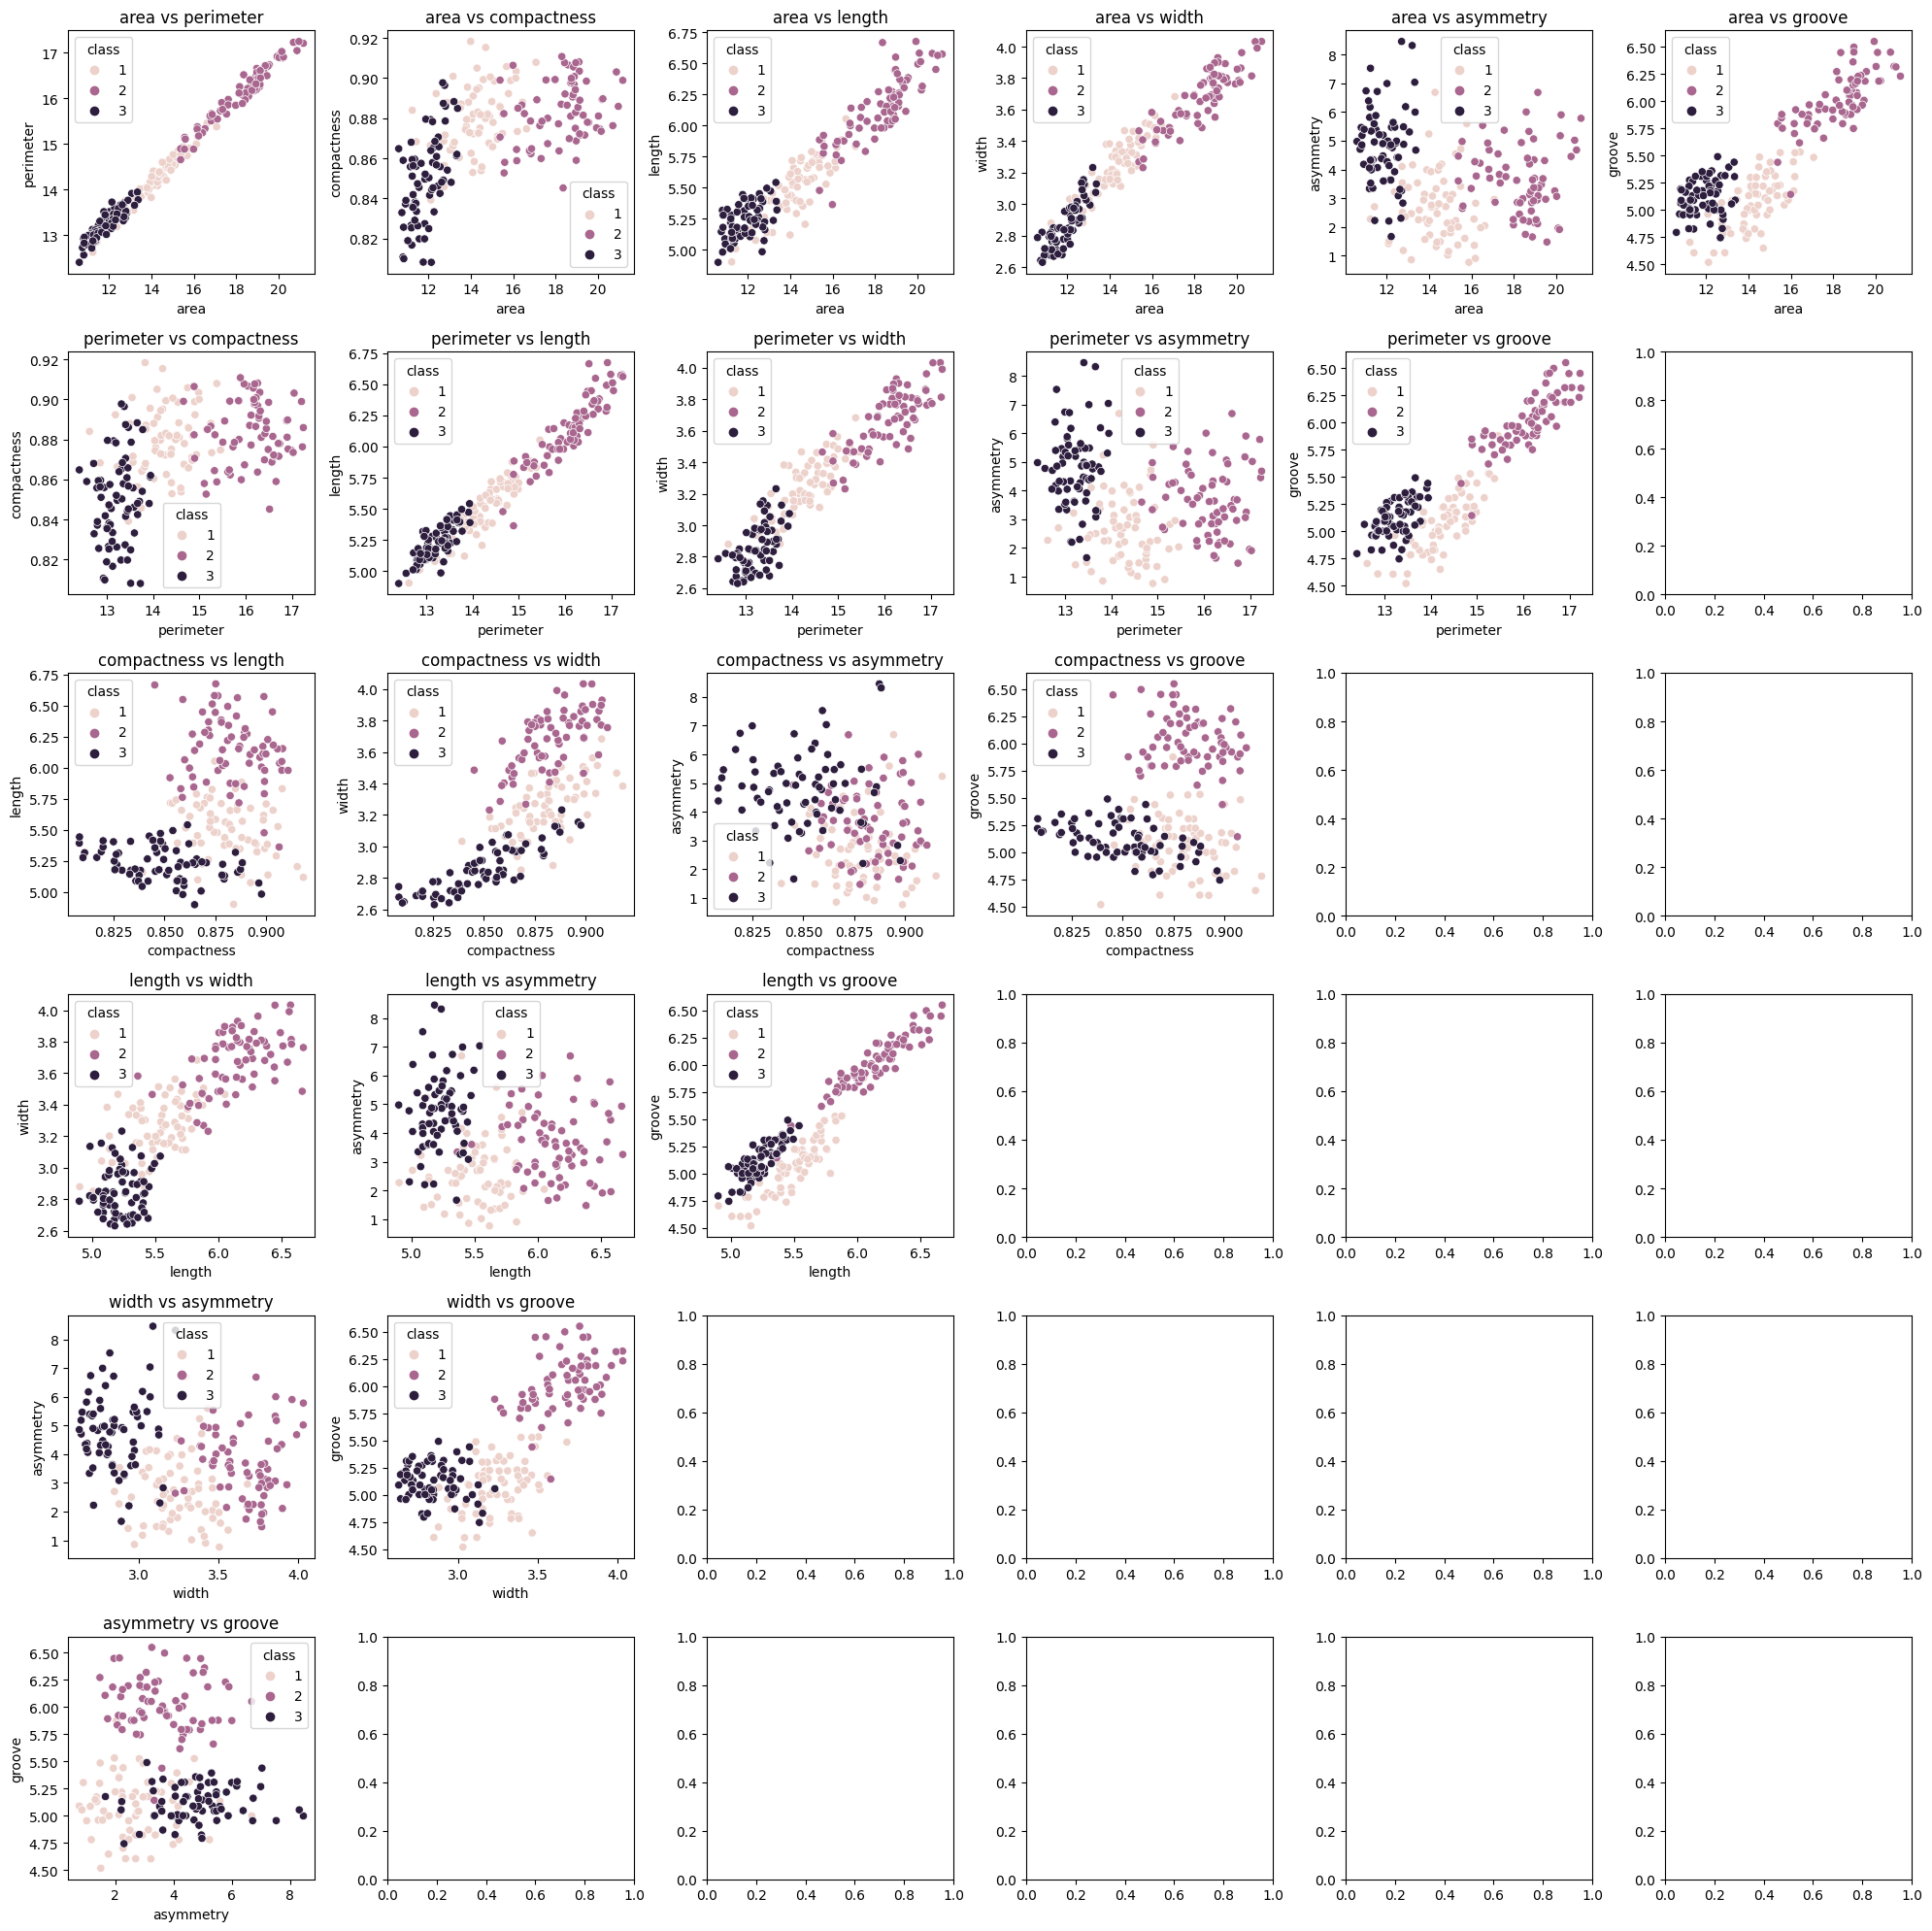

In [146]:
# Calculate the number of rows and columns for the grid
num_features = len(cols) - 1
num_rows = num_features - 1
num_cols = num_features - 1

# Create a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))

for i in range(num_rows):
    for j in range(num_cols - i):
        x_label = cols[i]
        y_label = cols[i + j + 1]
        _ = sns.scatterplot(x=x_label, y=y_label, data=df,
                            hue='class', ax=axes[i, j])
        _ = axes[i, j].set_title(f'{x_label} vs {y_label}')

# Adjust layout for better readability
_ = plt.tight_layout()

# Display the plots
_ = plt.show()

# KMeans

In [147]:
from sklearn.cluster import KMeans

In [167]:
# x = "perimeter"
x = "compactness"

y = "asymmetry"

X = df[[x, y]].values

In [168]:
kmeans = KMeans(n_clusters=3).fit(X)

c:\k26rahul\Code\Projects\Machine-Learning-Kylie-Ying\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [169]:
clusters = kmeans.labels_
clusters

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 2, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 2, 0, 0, 2, 1, 2, 2, 2, 1, 1, 1, 1, 0,
       2, 2, 1, 0, 0, 2, 2, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 1, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 2, 2, 2, 0, 2, 1, 0, 0, 2, 2, 2, 2, 0,
       0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 1, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2,
       2, 0, 2, 1, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 0,
       0, 1, 2, 1, 0, 2, 0, 0, 0, 2, 0, 2])

In [170]:
df['class'].values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int64)

In [171]:
cluster_df = pd.DataFrame(
    np.hstack(
        (X, clusters.reshape(-1, 1))
    ), columns=[x, y, "class"])

cluster_df

cluster_df['class'].unique()

,compactness,asymmetry,class
0,0.8710,2.221,1.0
1,0.8811,1.018,1.0
2,0.9050,2.699,1.0
3,0.8955,2.259,1.0
4,0.9034,1.355,1.0
...,...,...,...
205,0.8783,3.631,0.0
206,0.8511,4.325,0.0
207,0.8883,8.315,2.0
208,0.8521,3.598,0.0


array([1., 0., 2.])

In [172]:
def plot_kmeans_vs_original(cluster_df):
    cluster_df = cluster_df.copy()

    cluster_df.loc[cluster_df['class'] == 0, 'class'] = 'A'
    cluster_df.loc[cluster_df['class'] == 1, 'class'] = 'B'
    cluster_df.loc[cluster_df['class'] == 2, 'class'] = 'C'

    # KMeans Scatter Plot
    _ = plt.figure(figsize=(12, 6))
    _ = plt.subplot(1, 2, 1)
    _ = sns.scatterplot(x=x, y=y, hue='class', data=cluster_df)
    _ = plt.title('KMeans Clustering')

    # Original Scatter Plot
    _ = plt.subplot(1, 2, 2)
    _ = sns.scatterplot(x=x, y=y, hue='class', data=df)
    _ = plt.title('Original Data')

    # Adjust layout for better readability
    _ = plt.tight_layout()

    # Show the plot
    _ = plt.show()

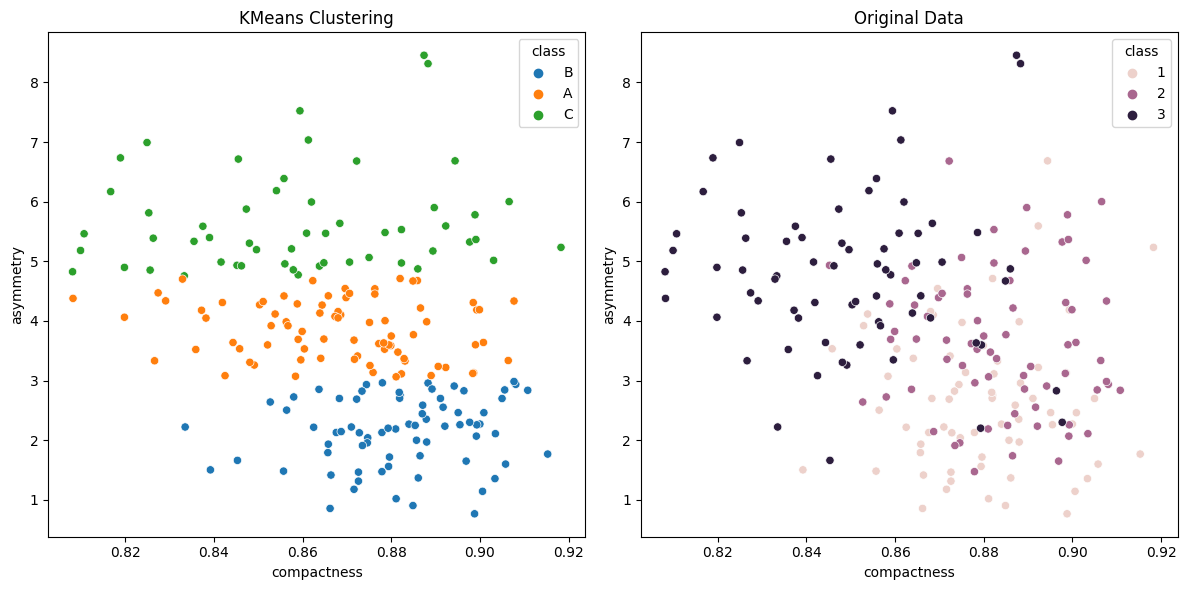

In [173]:
plot_kmeans_vs_original(cluster_df)

# KMeans: Higher dimensions

In [174]:
X = df[cols[:-1]].values

In [175]:
kmeans = KMeans(n_clusters=3).fit(X)

c:\k26rahul\Code\Projects\Machine-Learning-Kylie-Ying\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [176]:
cluster_df = pd.DataFrame(np.hstack(
    (X, kmeans.labels_.reshape(-1, 1))
), columns=df.columns)

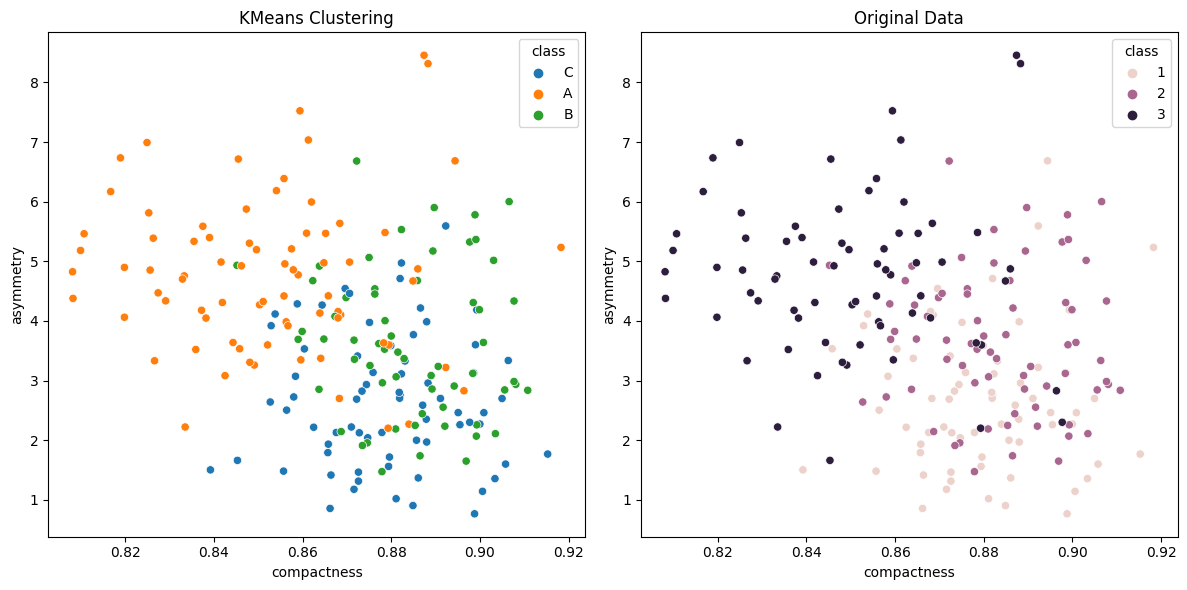

In [177]:
plot_kmeans_vs_original(cluster_df)

# PCA